# **Data Cleaning Notebook**

## Objectives

* Clean data
* Split cleaned dataset into Train and Test sets

## Inputs

* outputs/datasets/collection/LoanDefaultData.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned


---

In [85]:
# Ignore FutureWarnings
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# Change working directory

We need to change the working directory from its current folder, where the notebook is stored, to its parent folder
* First we access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

* Then we want to make the parent of the current directory the new current directory
    * os.path.dirname() gets the parent directory
    * os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print(f"You set a new current directory: {current_dir}")

---

# Load Data

In [88]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/LoanDefaultData.csv")
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


# Data Cleaning

In [89]:
target_var = "loan_status"

## Drop duplicate entries

In the data collection step we already established that there are some duplicated entries in the dataset. As they account to less than 1 % of data we will drop them from the dataset.

Show duplicated entries:

In [90]:
duplicates = df.duplicated()
df[df.duplicated(keep=False)].sort_values(by=['person_age','person_income'])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
29484,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


Duplicates should be dropped before splitting into training and test sets to prevent data leakage, which could artificially inflate model performance. Removing duplicates beforehand also ensures that both sets reflect the true data distribution and that evaluation metrics remain reliable.

No duplicated entries remain after dropping them:

In [91]:
df = df.drop_duplicates()
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


## Split Train and Test Set

Missing data imputation and outlier treatment should be done after splitting into training and test sets to avoid data leakage. Therefore we now split the data into train and test set.

In [92]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df[target_var],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (25932, 12) 
TestSet shape: (6484, 12)


## Missing Data

We first check for missing data in the train set and can confirm that there is some missing data present in the dataset.

In [93]:
def show_missing_values(df):
    print("Number of missing values in each column:")

    missing_count = df.isna().sum()
    missing_percent = (df.isna().sum() / len(df)) * 100

    missing_data = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percent.round(2)
    })

    print(missing_data)

    print("\nTotal number of missing values in the dataframe:", df.isna().sum().sum())
    
show_missing_values(TrainSet)

Number of missing values in each column:
                            Missing Values  Percentage
person_age                               0        0.00
person_income                            0        0.00
person_home_ownership                    0        0.00
person_emp_length                      710        2.74
loan_intent                              0        0.00
loan_grade                               0        0.00
loan_amnt                                0        0.00
loan_int_rate                         2515        9.70
loan_status                              0        0.00
loan_percent_income                      0        0.00
cb_person_default_on_file                0        0.00
cb_person_cred_hist_length               0        0.00

Total number of missing values in the dataframe: 3225


* The Train Set contains missing values in the variables `person_emp_length` and `loan_int_rate`, both with less than 10% of observations missing

Given the relatively small proportion of missing data, these values will be handled using **median imputation**. This approach is appropriate since the numerical features are skewed and contain outliers, making the median a more robust measure than the mean.

In [94]:
from feature_engine.imputation import MeanMedianImputer

imputer = MeanMedianImputer(imputation_method='median', variables=['person_emp_length', 'loan_int_rate'])

df_cleaned = imputer.fit_transform(TrainSet)

show_missing_values(df_cleaned)

Number of missing values in each column:
                            Missing Values  Percentage
person_age                               0         0.0
person_income                            0         0.0
person_home_ownership                    0         0.0
person_emp_length                        0         0.0
loan_intent                              0         0.0
loan_grade                               0         0.0
loan_amnt                                0         0.0
loan_int_rate                            0         0.0
loan_status                              0         0.0
loan_percent_income                      0         0.0
cb_person_default_on_file                0         0.0
cb_person_cred_hist_length               0         0.0

Total number of missing values in the dataframe: 0


Compare distributions before and after imputing the missing values:

In [95]:
print("Before imputing missing values:")
missing_cols = ['person_emp_length', 'loan_int_rate']
TrainSet[missing_cols].describe().T


Before imputing missing values:


,count,mean,std,min,25%,50%,75%,max
person_emp_length,25222.0,4.792721,4.171791,0.00,2.0,4.00,7.00,123.00
loan_int_rate,23417.0,11.021638,3.246530,5.42,7.9,10.99,13.48,23.22


In [96]:
print("After imputing missing values:")
df_cleaned[missing_cols].describe().T

After imputing missing values:


,count,mean,std,min,25%,50%,75%,max
person_emp_length,25932.0,4.771017,4.116316,0.00,2.00,4.00,7.00,123.00
loan_int_rate,25932.0,11.018570,3.085092,5.42,8.49,10.99,13.16,23.22


The summary statistics between the original training dataset and the cleaned dataset are very similar, indicating that the distributions have not been significantly affected by the median imputation. This confirms that the imputation preserved the overall data characteristics, so the same median imputer will now be applied to both the training and test sets.

In [97]:
imputer = MeanMedianImputer(imputation_method='median', variables=['person_emp_length', 'loan_int_rate'])

TrainSet = imputer.fit_transform(TrainSet)
TestSet = imputer.transform(TestSet)

# Outlier

In the previous exploratory analysis, we observed that several numerical variables contained pronounced outliers, mostly in the upper range of their distributions.
To mitigate their influence on model performance while preserving the overall data structure, we apply Winsorization on the right tail.

This approach caps extreme values at defined thresholds (based on the interquartile range), reducing the impact of outliers without removing observations from the dataset.

We use a fold of 5 for Winsorization to cap only the most extreme outliers. For `person_income`, `person_age`, and `person_emp_length`, we observed some values that are clearly not realistic. Other numerical variables also show outliers, but they lie within a credible range, so trimming them is not strictly necessary as it would remove potentially useful information. Depending on the model choice, this decision can be revisited; for example, linear models might benefit from a tighter fold to reduce the influence of extreme values.


Apply Winsorization:

In [98]:
from feature_engine.outliers import Winsorizer

numeric_cols = TrainSet.select_dtypes(include=['float64', 'int64']).columns.drop("loan_status").tolist()

winsorizer = Winsorizer(capping_method='iqr', fold=5, tail='right', variables=numeric_cols)

df_winsorized = winsorizer.fit_transform(TrainSet)

Compare differences:

In [99]:
import pandas as pd

def count_outliers(series):
    """Return the number of outliers in a pandas Series using the IQR method."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Compute outlier counts for each feature before and after cleaning
outliers_before = {col: count_outliers(TrainSet[col]) for col in numeric_cols}
outliers_after = {col: count_outliers(df_winsorized[col]) for col in numeric_cols}

# Combine results into a single DataFrame (one column per feature)
outlier_comparison = pd.DataFrame([outliers_before, outliers_after], index=['Outliers Before Cleaning', 'Outliers After Cleaning']).T

outlier_comparison


,Outliers Before Cleaning,Outliers After Cleaning
person_age,27,0
person_income,149,0
person_emp_length,4,0
loan_amnt,0,0
loan_int_rate,0,0
loan_percent_income,0,0
cb_person_cred_hist_length,0,0


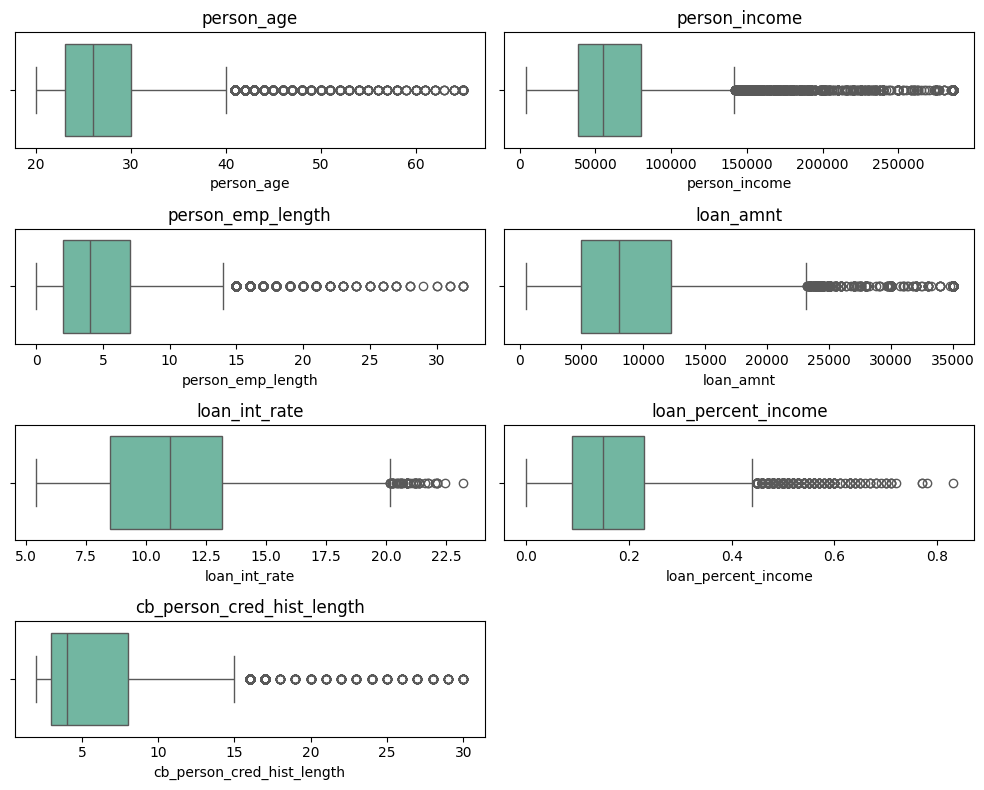

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 2  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*2))
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_winsorized[col], ax=axes[i], color=sns.color_palette("Set2")[0])
    axes[i].set_title(f"{col}")

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The outlier comparison and boxplots show that all extreme values in the numerical features were effectively removed after applying Winsorization on the right tail. This confirms that the Winsorizer successfully capped high-end outliers without altering the overall data structure. Based on these results, we will apply the same Winsorization procedure to both the training and test sets to ensure consistent preprocessing across the entire modeling pipeline.

In [101]:
winsorizer = Winsorizer(capping_method='iqr', fold=5, tail='right', variables=numeric_cols)

TrainSet = winsorizer.fit_transform(TrainSet)
TestSet = winsorizer.transform(TestSet)

---

# Push files to Repo

In [102]:
import joblib
import os

# Set the file_path
file_path = 'outputs/datasets/cleaned'

# Try to generate output folder
try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

# Save the Train and Test sets as csv files for further use
filename = "TrainSet.csv"
TrainSet.to_csv(f"{file_path}/{filename}", index=False)

filename = "TestSet.csv"
TestSet.to_csv(f"{file_path}/{filename}", index=False)


[WinError 183] Cannot create a file when that file already exists: 'outputs/datasets/cleaned'


---

# Conclusions and Next Steps

We performed key data cleaning steps including:
* Removal of duplicate rows
* Median imputation for missing values
* Winsorization of outliers 

Further data cleaning actions are not required, as all columns could potentially have predictive power, no columns need removal, and categorical values were consistent in the exploratory analysis.

Next Steps:
* Prepare data for feature engineering and modeling